In [50]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

a = 1
b = 7
h = 0.01
y0 = 1
p = 8
k = (p + 2) / (p + 1)


def sol(x):
    return x**10


def f(x, y):
    return 10 * y**(9/10)





x_exact = np.linspace(a, b, 500)
y_exact = sol(x_exact)

x = sp.symbols('x')
p = 8
y = sp.Function('y')

solution = x**(p + 2)
solution
print(f"Рішення диференціального рівняння: y = {solution}")


Рішення диференціального рівняння: y = x**10


Перші 5 значень (x, y):
[1.   1.01 1.02 1.03 1.04] [1.         1.10462206 1.21899428 1.34391616 1.48024397]

Останні 5 значень (x, y):
[6.96 6.97 6.98 6.99 7.  ] [2.66742533e+08 2.70599915e+08 2.74507428e+08 2.78465651e+08
 2.82475168e+08]


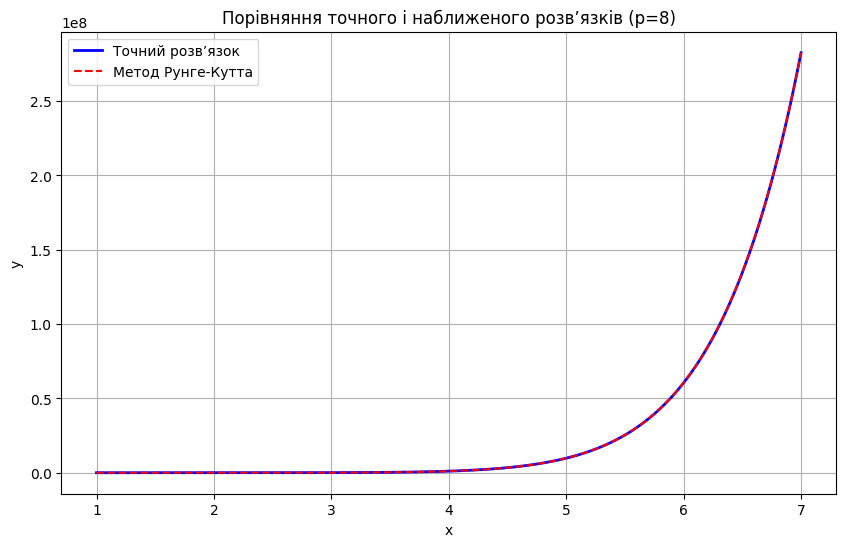

In [51]:
def runge_kutta(f, a, b, y0, h):
    n = int((b - a) / h) + 1
    x = np.linspace(a, b, n)
    y = np.zeros(n)
    y[0] = y0

    for i in range(n - 1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h / 2, y[i] + h / 2 * k1)
        k3 = f(x[i] + h / 2, y[i] + h / 2 * k2)
        k4 = f(x[i] + h, y[i] + h * k3)
        y[i + 1] = y[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return x, y


x_rk, y_rk = runge_kutta(f, a, b, y0, h)
# Вивести перші 5 та останні 5 значень чисельного розв’язку методом Рунге-Кутта
print("Перші 5 значень (x, y):")
print(x_rk[:5], y_rk[:5])
print("\nОстанні 5 значень (x, y):")
print(x_rk[-5:], y_rk[-5:])

# x_rk — вузли сітки (масив x)
# y_rk — значення наближеного розв’язку в цих вузлах (метод Рунге-Кутта)
plt.figure(figsize=(10, 6))
plt.plot(x_exact, y_exact, label='Точний розв’язок', color='blue', linewidth=2)
plt.plot(x_rk, y_rk, label='Метод Рунге-Кутта', linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Порівняння точного і наближеного розв’язків (p=8)')
plt.grid(True)
plt.legend()
plt.show()



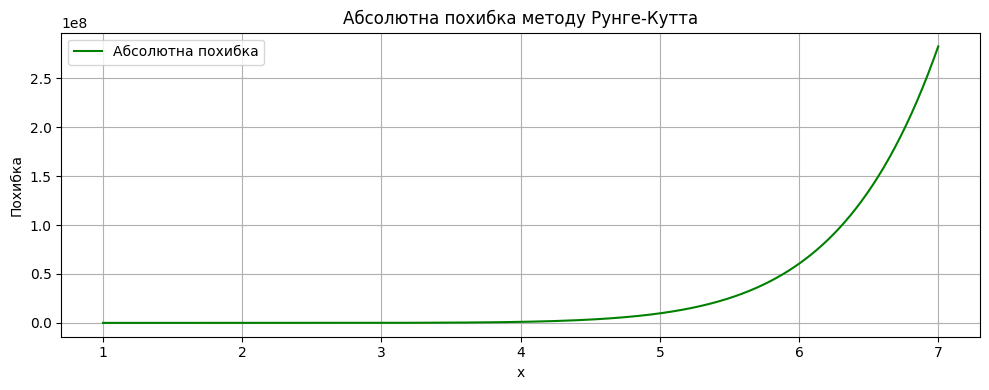

In [52]:
error = sol(x_rk) 
plt.figure(figsize=(10, 4))
plt.plot(x_rk, error, label='Абсолютна похибка', color='green')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.title('Абсолютна похибка методу Рунге-Кутта')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

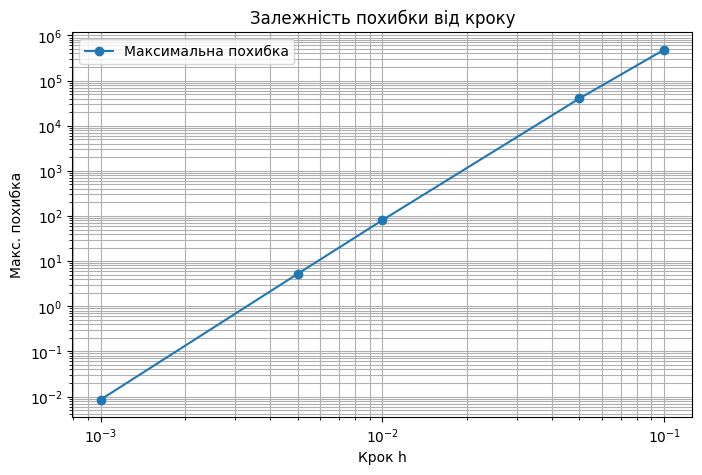

In [53]:
hs = [0.1, 0.05, 0.01, 0.005, 0.001]
max_errors = []

for h_val in hs:   
    xs_h, ys_h = runge_kutta(f, a, b, y0, h_val)
    ys_h_exact = sol(xs_h)
    max_err = np.max(np.abs(ys_h - ys_h_exact))
    max_errors.append(max_err)

plt.figure(figsize=(8, 5))
plt.loglog(hs, max_errors, 'o-', label='Максимальна похибка')
plt.xlabel('Крок h')
plt.ylabel('Макс. похибка')
plt.title('Залежність похибки від кроку')
plt.grid(True, which='both')
plt.legend()
plt.show()

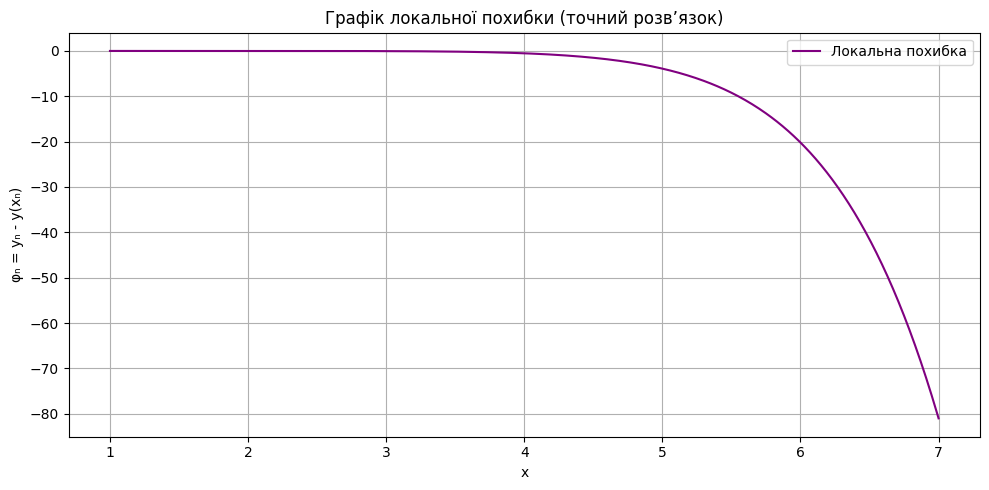

In [ ]:
local_error = y_rk - sol(x_rk)

plt.figure(figsize=(10, 5))
plt.plot(x_rk, local_error, label='Локальна похибка', color='purple')
plt.xlabel('x')
plt.ylabel('φₙ = yₙ - y(xₙ)')
plt.title('Графік локальної похибки (точний розв’язок)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


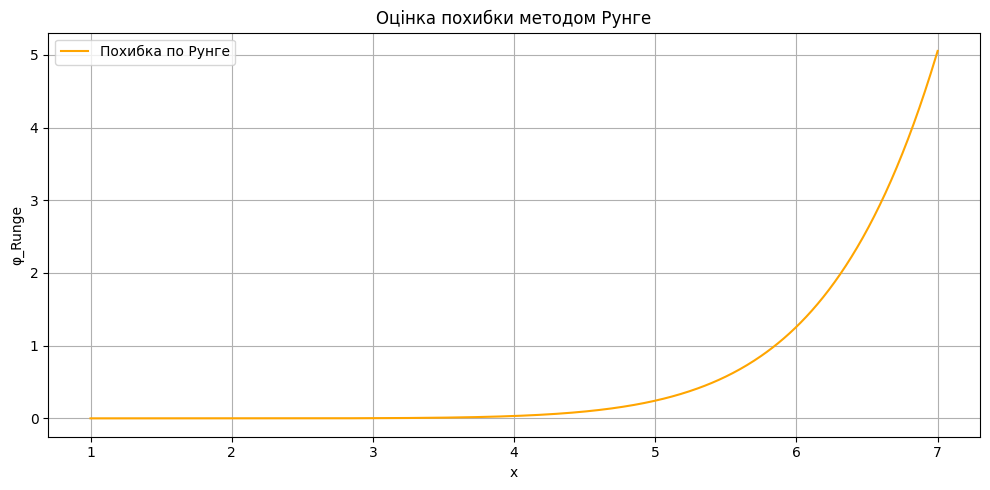

In [ ]:
# y_h — з кроком h
_, y_h = runge_kutta(f, a, b, y0, h)

_, y_h2_full = runge_kutta(f, a, b, y0, h / 2)

# беремо через один вузол, щоб зрівняти з y_h
y_h2 = y_h2_full[::2]

# Похибка Рунге
runge_error = np.abs((y_h2 - y_h) / 15)

plt.figure(figsize=(10, 5)) 
plt.plot(x_rk, runge_error, label='Похибка по Рунге', color='orange')
plt.xlabel('x')
plt.ylabel('φ_Runge')
plt.title('Оцінка похибки методом Рунге')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


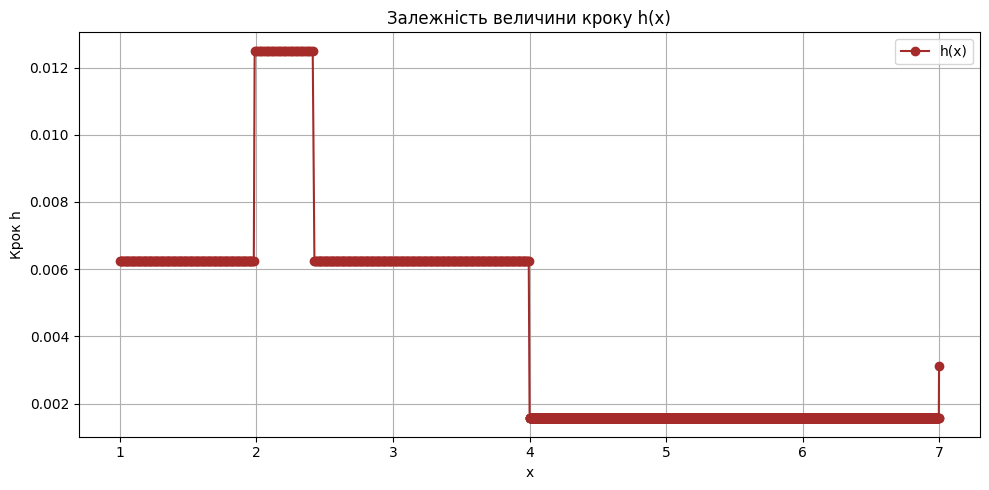

In [ ]:
def adaptive_rk(f, a, b, y0, eps=1e-6, h_init=0.1):
    x_vals = [a]
    y_vals = [y0]
    h_vals = []
    x = a
    y = y0
    h = h_init

    while x < b:
        if x + h > b:
            h = b - x
        _, yh = runge_kutta(f, x, x + h, y, h)
        _, yh2 = runge_kutta(f, x, x + h, y, h / 2)

        err = abs((yh2[-1] - yh[-1]) / 15)
        if err > eps:
            h /= 2
        elif err < eps / 2:
            x += h
            y = yh2[-1]
            x_vals.append(x)
            y_vals.append(y)
            h_vals.append(h)
            h *= 2
        else:
            x += h
            y = yh2[-1]
            x_vals.append(x)
            y_vals.append(y)
            h_vals.append(h)

    return np.array(x_vals), np.array(y_vals), np.array(h_vals)


# Виклик адаптивного алгоритму
x_adapt, y_adapt, h_steps = adaptive_rk(f, a, b, y0)

# Побудова h(x)
plt.figure(figsize=(10, 5))
plt.plot(x_adapt[:-1], h_steps, marker='o', label='h(x)', color='brown')
plt.xlabel('x')
plt.ylabel('Крок h')
plt.title('Залежність величини кроку h(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()